In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import scipy.integrate as spi

In [2]:
path = "/Users/dillon/Desktop"
data = h5py.File(f"{path}/data.h5", "r")

SFH = data["SFH"]

In [5]:
DTD = data["DTD"]

event_types = ["Ia", "IIP", "II", "Ib", "Ic", "LGRB", "PISNe", "BBH", "BHNS", "BNS"]
metallicities = ["z001", "z002", "z003", "z004", "z006", "z008", "z010", "z014", "z020", "z030", "z040", "zem4", "zem5" ]


event_total = {}
for i in (metallicities):
    event_total[i] = {}
    for j in event_types:
        event_total[i][j] = DTD[j][i][:]
    event_total[i]["CCSN"] = event_total[i]["II"] + event_total[i]["Ib"] + event_total[i]["Ic"] + event_total[i]["IIP"]


Z1 = metallicities[8] 

x1 = event_total[Z1]
DTD = x1["CCSN"]


bin_centres = data['DTD'].attrs['bin_centres']

##### SFH

In [65]:
z = np.linspace(0, 20, 10000)

M_D = 0.015 * (1 + z)**2.7 / (1 + ((1 + z) / 2.9)**5.6)

trans_M_D = 0.66 * M_D

In [66]:
h = SFH.attrs['h']
omega_M = SFH.attrs['omega_M']
omega_L = SFH.attrs['omega_L']

In [67]:
@np.vectorize
def lookback(z, omega1, omega2, hubble):
    
    def f(x):
        a = np.sqrt(omega1*(1+x)**3 + omega2)
        return 1/((1+x)*a)
    t_hubble = (1/(100*hubble))*3.0856776*10**19
    return t_hubble *spi.quad(f, 0, z)[0]/(60*60*24*365.2388526*1e9)

Text(0.5, 0, 'Lookback Time (Gyr)')

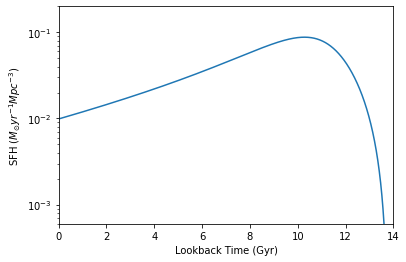

In [68]:
plt.plot(lookback(z, omega_M, omega_L, h), trans_M_D)
plt.xlim(0, 14)
plt.ylim(6e-4,2e-1)
plt.yscale('log')
plt.ylabel('SFH ($M_{\odot} yr^{-1} Mpc^{-3}$)')
plt.xlabel('Lookback Time (Gyr)')

In [69]:
num_bins = 50


bin_lookback_times = np.linspace(13.6, 0, num_bins + 1)

integrated_SFH = np.zeros(num_bins)


for i in range(num_bins):

    bin_mask = np.logical_and(lookback(z, omega_M, omega_L, h) <= bin_lookback_times[i], lookback(z, omega_M, omega_L, h) > bin_lookback_times[i + 1])
    bin_M_D = trans_M_D[bin_mask][::-1] 
    integrated_SFH[i] = spi.simps(bin_M_D, z[bin_mask][::-1])  


integrated_SFH = np.abs(integrated_SFH)

In [70]:
integrated_SFH

array([0.0139493 , 0.01644406, 0.01811781, 0.0193074 , 0.02012832,
       0.02053183, 0.02039589, 0.01994215, 0.0188173 , 0.01777419,
       0.01605487, 0.01429558, 0.01279378, 0.01104352, 0.0095305 ,
       0.00832142, 0.00713182, 0.00614651, 0.00522881, 0.0045149 ,
       0.00386518, 0.00338746, 0.00295367, 0.00256324, 0.00221422,
       0.0019838 , 0.00177331, 0.00151223, 0.00134764, 0.00119879,
       0.00100703, 0.00100074, 0.00083465, 0.00073682, 0.00069395,
       0.00061018, 0.00057506, 0.0005035 , 0.00047505, 0.00041401,
       0.00035939, 0.00037082, 0.00029257, 0.00030505, 0.00026255,
       0.00024888, 0.00021262, 0.00020212, 0.00019195, 0.0001623 ])

In [71]:
bin_size_gyrs = np.abs(np.diff(bin_lookback_times))
bin_size_gyrs = bin_size_gyrs[0]
bin_size_gyrs = round(bin_size_gyrs, 2)

##### DTD

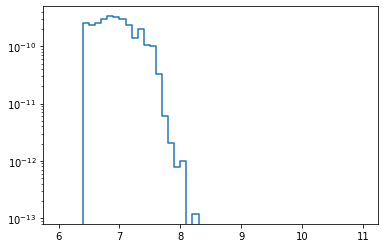

In [72]:
plt.step(bin_centres, DTD)
plt.yscale('log')

In [73]:
linear_bin_centres = 10**bin_centres
linear_bin_centres_gyrs = linear_bin_centres / 1e9

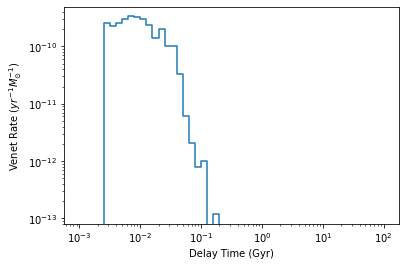

In [74]:
plt.step(linear_bin_centres_gyrs, DTD)
plt.xlabel('Delay Time (Gyr)')
plt.ylabel('Venet Rate ($yr^{-1} M_{\odot}^{-1}$)')
plt.xscale('log')
plt.yscale('log')

In [75]:
mask = (linear_bin_centres_gyrs >= 0) & (linear_bin_centres_gyrs <= 13.6)


filtered_linear_bin_centres_gyrs = linear_bin_centres_gyrs[mask]
filtered_DTD = DTD[mask]

In [76]:
bin_edges = np.arange(0, 13.6 + bin_size_gyrs, bin_size_gyrs)


digitized = np.digitize(filtered_linear_bin_centres_gyrs, bin_edges)


integrated_DTD = np.zeros(len(bin_edges) - 1)


for i in range(1, len(bin_edges)):
    bin_mask = (digitized == i)
    
    if np.any(bin_mask):  
        integrated_DTD[i - 1] = spi.simps(filtered_DTD[bin_mask], filtered_linear_bin_centres_gyrs[bin_mask])



In [77]:
integrated_DTD

array([8.01733336e-12, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [79]:
rates = np.zeros(num_bins)

for i in range(num_bins):
    rate = 0.0  
    for j in range(i + 1):
        
        rate += integrated_SFH[j] * integrated_DTD[i - j]
    rates[i] = rate / bin_size_gyrs  

In [80]:
rates

array([4.14208216e-13, 4.88287038e-13, 5.37987262e-13, 5.73310687e-13,
       5.97686928e-13, 6.09668554e-13, 6.05631967e-13, 5.92158777e-13,
       5.58757752e-13, 5.27783805e-13, 4.76730567e-13, 4.24490416e-13,
       3.79896358e-13, 3.27924362e-13, 2.82997043e-13, 2.47094891e-13,
       2.11771100e-13, 1.82513394e-13, 1.55263322e-13, 1.34064751e-13,
       1.14772038e-13, 1.00586652e-13, 8.77057722e-14, 7.61123397e-14,
       6.57486267e-14, 5.89064974e-14, 5.26563342e-14, 4.49040343e-14,
       4.00166050e-14, 3.55965973e-14, 2.99024378e-14, 2.97157664e-14,
       2.47840115e-14, 2.18790936e-14, 2.06061796e-14, 1.81184727e-14,
       1.70758426e-14, 1.49509104e-14, 1.41059351e-14, 1.22934627e-14,
       1.06715679e-14, 1.10111023e-14, 8.68745290e-15, 9.05802909e-15,
       7.79603792e-15, 7.39018245e-15, 6.31343967e-15, 6.00179815e-15,
       5.69976298e-15, 4.81918485e-15])

In [83]:
bin_centers_linear = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_centers_linear = bin_centers_linear[:-1]

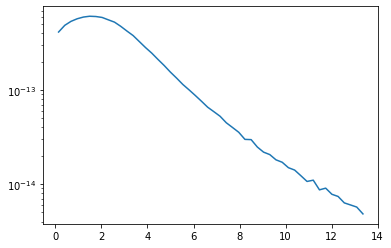

In [84]:
plt.plot(bin_centers_linear, rates)
plt.yscale('log')